In [6]:
import pandas as pd
import numpy as np

In [39]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
len(data)

200

In [9]:
data["Correlacion"] = (data["TV"] - np.mean(data["TV"]))* (data["Sales"] - np.mean(data["Sales"]))

In [10]:
data.head()

,TV,Radio,Newspaper,Sales,Correlacion
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [11]:
data["Correlacion1"] = ( data["TV"] - np.mean(data["TV"]) )**2

In [12]:
data.head()

,TV,Radio,Newspaper,Sales,Correlacion,Correlacion1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [13]:
data["Correlacion2"] = (data["Sales"] - np.mean(data["Sales"]))**2

In [14]:
data.head()

,TV,Radio,Newspaper,Sales,Correlacion,Correlacion1,Correlacion2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [15]:
correlacion_pearson = sum(data["Correlacion"])/np.sqrt(sum(data["Correlacion1"]) * sum(data["Correlacion2"]))

In [16]:
correlacion_pearson # El coste es positivo para las ventas

0.782224424861606

In [35]:
#Funcion para calcular los pares de correlacion

def coeficienteCorrelacion (df, var1, var2):
    df["Correlacion"] =  (df[var1] - np.mean(df[var1]))* (df[var2] - np.mean(df[var2]))
    df["Correlacion1"] = (df[var1] - np.mean(df[var1]))**2
    df["Correlacion2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["Correlacion"])/np.sqrt(sum(df["Correlacion1"]) * sum(df["Correlacion2"]))
    return corr_p
                          

In [36]:
coeficienteCorrelacion(data,"TV","Sales")

0.782224424861606

In [37]:
coeficienteCorrelacion(data,"Radio","Sales")

0.576222574571055

In [38]:
coeficienteCorrelacion(data,"Newspaper","Sales")

0.22829902637616534

In [40]:
cols = data.columns.values

In [41]:
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [42]:
for x in cols:
    for y in cols:
        print(x + ", "+ y+ " : "+str(coeficienteCorrelacion(data,x,y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583006
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583006
Radio, Radio : 1.0
Radio, Newspaper : 0.35410375076117545
Radio, Sales : 0.576222574571055
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.35410375076117545
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616534
Sales, TV : 0.782224424861606
Sales, Radio : 0.576222574571055
Sales, Newspaper : 0.22829902637616534
Sales, Sales : 1.0


In [43]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gastos en TV vs Ventas del Producto')

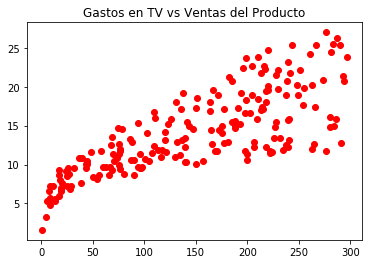

In [45]:
plt.plot(data["TV"],data["Sales"], "ro")
plt.title("Gastos en TV vs Ventas del Producto")

Text(0.5, 1.0, 'Gastos en Radio vs Ventas del Producto')

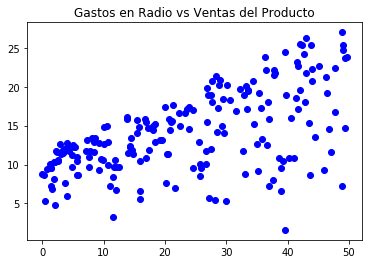

In [48]:
plt.plot(data["Radio"],data["Sales"], "bo")
plt.title("Gastos en Radio vs Ventas del Producto")

Text(0.5, 1.0, 'Gastos en Periodico vs Ventas del Producto')

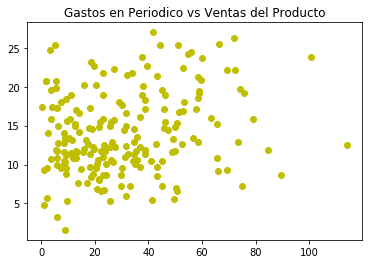

In [49]:
plt.plot(data["Newspaper"],data["Sales"], "yo")
plt.title("Gastos en Periodico vs Ventas del Producto")

In [52]:
data = pd.read_csv("../datasets/ads/Advertising.csv")
data.corr()#correlacion

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


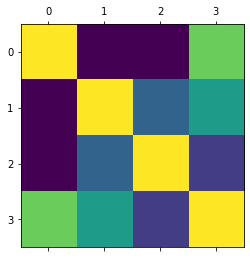

In [54]:
plt.matshow(data.corr())